# CA06: Customer Segmentation Using K-Means Clustering

Objective: The aim of this assignment is to perform customer segmentation
using the K-Means clustering algorithm in order to better understand the
different types of customers in a given dataset.



The dataset contains the following attributes:

1. CustomerID: Unique ID for each customer
2. Gender: Male or Female
3. Age: Age of the customer
4. Annual Income (k$): Annual income of the customer in thousands of dollars
5. Spending Score (1-100): A score assigned by the mall based on customer
behavior and spending nature (higher scores indicate higher spending)

## Load the Dataset and Perform EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Load the dataset
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-Data/raw/main/CA06/Mall_Customers.csv")

In [ ]:
# Print the first few rows
print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
# Print the shape of the dataframe
print(df.shape)

(200, 5)


In [ ]:
# Check datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# Check for missing values
print(df.isnull().sum())

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


(array([31., 19., 34., 29., 16., 26., 15., 10.,  6., 14.]),
 array([18. , 23.2, 28.4, 33.6, 38.8, 44. , 49.2, 54.4, 59.6, 64.8, 70. ]),
 <BarContainer object of 10 artists>)

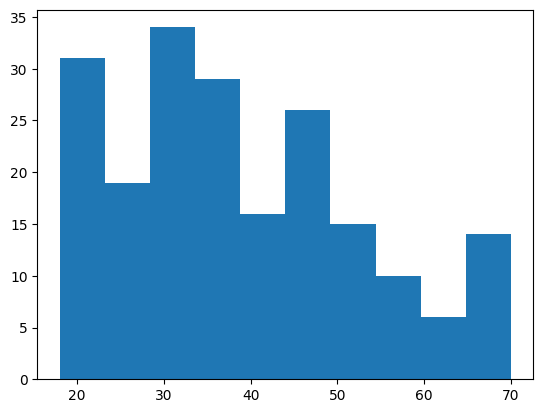

In [ ]:
# Plot the numceric columns in a histogram
plt.hist(df['Age'])

(array([24., 22., 28., 38., 30., 36.,  8.,  6.,  4.,  4.]),
 array([ 15. ,  27.2,  39.4,  51.6,  63.8,  76. ,  88.2, 100.4, 112.6,
        124.8, 137. ]),
 <BarContainer object of 10 artists>)

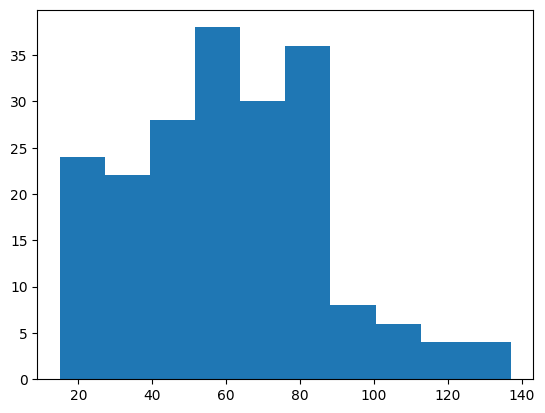

In [ ]:
# Plot the numceric columns in a histogram
plt.hist(df['Annual Income (k$)'])

(array([16., 20., 10., 17., 35., 37., 11., 24., 14., 16.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

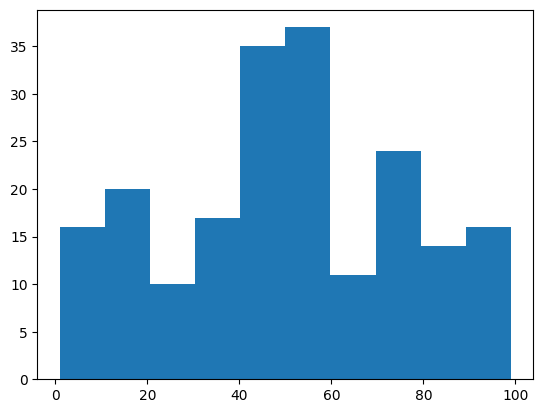

In [ ]:
# Plot the numceric columns in a histogram
plt.hist(df['Spending Score (1-100)'])

(array([16., 20., 10., 17., 35., 37., 11., 24., 14., 16.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

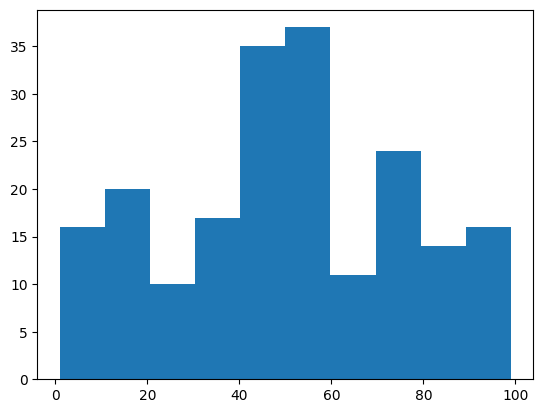

In [ ]:
# Plot the numceric columns in a histogram
plt.hist(df['Spending Score (1-100)'])

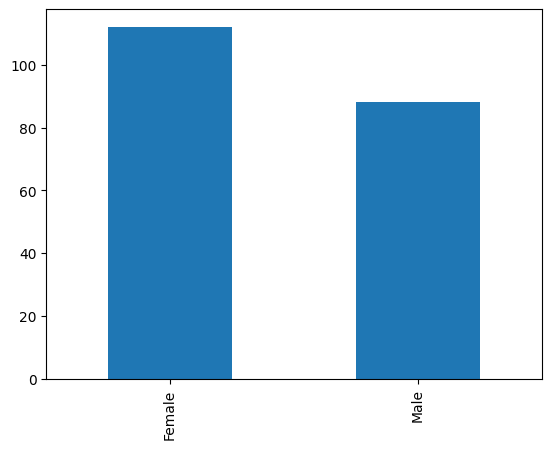

In [ ]:
# Show the distribution of the categorical column
df['Genre'].value_counts().plot(kind='bar')
plt.show()

## Prepare the Data for Clustering

In [ ]:
# Scale features annual income and spending score
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[["Annual Income (k$)","Spending Score (1-100)"]])

In [ ]:
# Create a new dataframe with our scaled features
df_scaled = pd.DataFrame(scaled, columns = ["Annual_Income","Spending_Score"])

In [ ]:
# Check to make sure the dataframe formed correctly
df_scaled.head()

,Annual_Income,Spending_Score
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


## Implement k-means Clustering

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

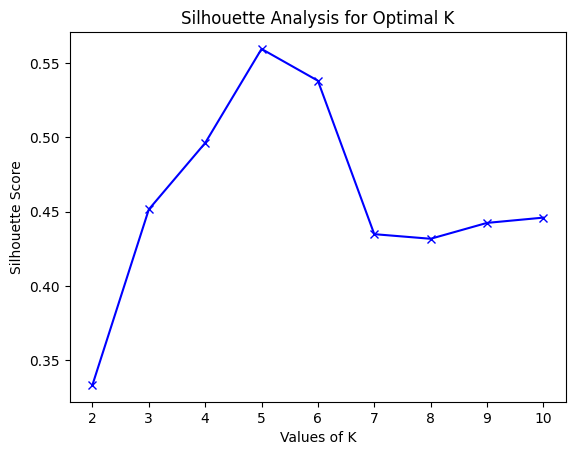

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Use the silhouette method to determine the optimal number of clusters
range_n_clusters = [2,3,4,5,6,7,8,9,10]
silhouette_scores = []
for num_clusters in range_n_clusters:
  kmeans = KMeans(n_clusters=num_clusters)
  cluster_labels = kmeans.fit_predict(df_scaled)
  silhouette_avg = silhouette_score(df_scaled,cluster_labels)
  silhouette_scores.append(silhouette_avg)

#Visualize Silhouette Scores
plt.plot(range_n_clusters,silhouette_scores,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal K')
plt.show()

Based on the above graph, the optimal number of clusters is K = 5.

In [ ]:
# Run KMeans clustering
kmeans = KMeans(n_clusters = 5)
kmeans.fit(df_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [ ]:
# Get cluster assignments for each point
cluster_assignments = kmeans.predict(df_scaled)

In [ ]:
# Check cluster assignments
df_scaled['Cluster_Assignments'] = cluster_assignments
df_scaled.head()

,Annual_Income,Spending_Score,Cluster_Assignments
0,0.000000,0.387755,3
1,0.000000,0.816327,4
2,0.008197,0.051020,3
3,0.008197,0.775510,4
4,0.016393,0.397959,3


# Visualize the Clusters

<Axes: xlabel='Annual_Income', ylabel='Spending_Score'>

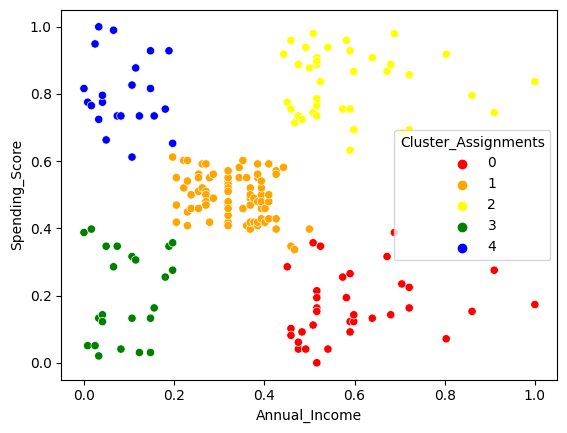

In [ ]:
# Visualize the clusters
sns.scatterplot(data = df_scaled,
                x = "Annual_Income",
                y = "Spending_Score",
                hue = "Cluster_Assignments",
                palette=['red','orange','yellow','green','blue'])

Cluster 0: Represented by the red in the bottom right of the scatter plot. This cluster seems to be represented by people with a high annual income but a low spending score.

Cluster 1: Represented by the orange in the middle of the scatter plot. This cluster can be described as both a mid-range annual income and spending score as.

Cluster 2: These are the yellow points in the top right of the scatter plot. It is made up of people who have both a high annual income and a high spending score.

Cluster 3: These are the points in green in the bottom left of the graph. It is represented by people who have a low annual income and a low spending score as well.

Cluster 4: These are the blue points in the top left of the scatter plot. It is made up of people who have a low annual income but a high spending score.

# Report on Findings

## Describe the Dataset and its Attributes

This dataset is 200 rows and 5 columns wide. The first column is CustomerID, which is the unique ID for each customer. The second column is the gender of the individual, male or female. The third column is the age of the customer. The fourth column is the annual income in thousands of dollars for the customer. The fifth and final column is the spending score, between 1 and 100, of the customer. The higher scores for the spending score indicates higher spending.

## Steps Taken for Data Preprocessing, Feature Selection and Scaling



The numeric variables we selected needed to be scaled for k-means clustering. The two variables chosen were Annual Income and Spending Score because that was the suggestion in the instructions. If we would have used a feature like gender, I would have encoded the gender variable to zeros and ones based on whether the entry was male or female. 

## Process of Determining Optimal Number of Clusters

To determine the optimal number of clusters, the silhouette method was used. The silhouette analysis showed that the optimal number of clusters when clustering with Annual Income and Spending Score should be clusters k = 5. If we used any other features, then the silhouette method may have produced a different optimal number of clusters.

## Describe the Clusters

In the 4th seciton of the questions, I talked about each of the clusters, specifically what they represent. In terms of size, the orange cluster is the smallest one, where as the green and blue clusters are a little larger, and the red and yellow clusters are the largest.

## Insights and Reccommendations

I think the clustering shows clear groups within the dataset when it comes to a comparison between Annual Income and Spending Score. If I did a deeper dive I would do a more in depth comparison testing different features for clustering.